In this lab, we will build a deep neural network from scratch with as many layers as you want.

<img src = "https://i.imgur.com/p0Jv0Rq.png" >

<b>Neural Network</b> are built out of neural nets , originally inspired by human neurons but now simply an abstract computational tool. <b>Neural Network</b> is one of the best computational tool for large scale problems that offer sufficient data to learn features automatically as it is computationally cheap compared to tradional models.

<br>

# Outline

* [Import Functions, and Libraries](#1)
* [Helper Functions and Test cases and Test cases](#2)
* [Initialization](#3)
 * [ 2-layer Neural Network](#3.1)
 * [L-Layer Model](#3.2)
* [Forward propagation module](#4)
 * [Linear Forward For a Single Layer](#4.1)
 * [Linear-Activation Forward For a Single Layer](#4.2)
 * [linear Pass](#4.3)
 * [Cost Function](#5)
* [Backward propagation module ](#6)
 * [Linear backward For a Single Layer](#6.1)
 * [Linear-Activation Backward For a Single Layer](#6.2)
 * [Backward Pass](#6.3)
 * [Update Parameters ](#6.4)
* [Predict](#6.5)
* [Print Mislabeled Images](#6.6)
* [Application ](#7)
  * [Load Data ](#7.1)
  * [Split the Data Into Train And Test Sets](#7.2)
  * [Architecture of The Model ](#7.3)
   * [2-Layer Neural Network](#7.31)
  * [Updating The Parameters ](#8)
  * [Computing The Accuracy](#9)

# Import Functions, and Libraries <a anchor = "anchor" id = "1"></a>

In [245]:
#import the necessary libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import os 
import random 

# Helper Functions and Test cases  <a anchor = "anchor" id = "2"></a>

<br>

### Helper Fuctions

Helper Functions provide some important functions for this notebook

In [246]:
def sigmoid(Z):
    '''
    Usage:
      #sigmoid --> computes the value of the sigmoid function given Z
  
    
    Arguments:
      #Z --> numpy array of any shape
    
    Returns:
      #A --> the output of sigmoid(Z) with the same shape as Z
      #cache --> returns Z as well but it useful during back propagation
    '''
    
    A = 1/(1+ np.exp(-Z))
    
    cache = Z 
    
    return A, Z

In [247]:
def sigmoid_backward(dA, cache):
    '''
    Usage:
      #sigmoid_backward --> used to implement the backward propagation for a single sigmoid unit.
  
    
    Arguments:
      #dA --> post-activation gradient, of any shape
      #cache --> 'Z' where we store for computing backward propagation efficiently
    
    Returns:
      #dZ --> gradient of the cost with respect to Z
    '''
    Z = cache 
    
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * (1 - s) * s
    
    #if the condition is false , the assert function will stop the program and throw an assertion error
    assert(dZ.shape == Z.shape)
    
    return dZ

In [248]:
def relu(Z):
    '''
    Usage:
      #relu --> computes the value of the ReLU function given Z
  
    
    Arguments:
      #Z --> an output of the linear layer, of any shape
    
    Returns:
      #A --> the output of relu(Z) with the same shape as Z
      #cache --> a python dictionary containing "A" which is  useful during back propagation
    '''
    
    A = np.maximum(Z,0)
    
    #if the condition is false , the assert function will stop the program and throw an assertion error
    assert(A.shape == Z.shape)
    
    cache = Z
    
    return A, Z 

In [249]:
def relu_backward(dA, cache):
    '''
    Usage:
      #relu_backward --> used to implement the backward propagation for a single RELU unit.
  
    
    Arguments:
      #dA --> post-activation gradient, of any shape
      #cache --> 'Z' where we store for computing backward propagation efficiently
    
    Returns:
      #dZ --> gradient of the cost with respect to Z
    '''
    
    Z = cache
    
    #convert dZ to a correct object 
    dZ = np.array(dA)
    
    # When z <= 0, you should set dz to 0 as well.
    dZ[Z <= 0] = 0
    
    #if the condition is false , the assert function will stop the program and throw an assertion error
    assert(dZ.shape == Z.shape)
    
    
    return dZ

### Test Cases

Test Cases provide some test cases to assess the correctness of your functions

In [250]:
def linear_forward_test_case():
    np.random.seed(1)
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = np.array([[1]])
    """
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    
    return A, W, b

In [251]:
def linear_activation_forward_test_case():
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = 5
    """
    np.random.seed(2)
    A_prev = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    return A_prev, W, b

In [252]:
def L_model_forward_test_case():
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    parameters = {'W1': np.array([[ 1.62434536, -0.61175641, -0.52817175],
        [-1.07296862,  0.86540763, -2.3015387 ]]),
 'W2': np.array([[ 1.74481176, -0.7612069 ]]),
 'b1': np.array([[ 0.],
        [ 0.]]),
 'b2': np.array([[ 0.]])}
    """
    np.random.seed(1)
    X = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return X, parameters

In [253]:
def compute_cost_test_case():
    Y = np.asarray([[1, 1, 1]])
    aL = np.array([[.8,.9,0.4]])
    
    return Y, aL

In [254]:
def linear_backward_test_case():
    """
    z, linear_cache = (np.array([[-0.8019545 ,  3.85763489]]), (np.array([[-1.02387576,  1.12397796],
       [-1.62328545,  0.64667545],
       [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), np.array([[1]]))
    """
    np.random.seed(1)
    dZ = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    linear_cache = (A, W, b)
    return dZ, linear_cache

In [255]:
def linear_activation_backward_test_case():
    """
    aL, linear_activation_cache = (np.array([[ 3.1980455 ,  7.85763489]]), ((np.array([[-1.02387576,  1.12397796], [-1.62328545,  0.64667545], [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), 5), np.array([[ 3.1980455 ,  7.85763489]])))
    """
    np.random.seed(2)
    dA = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    Z = np.random.randn(1,2)
    linear_cache = (A, W, b)
    activation_cache = Z
    linear_activation_cache = (linear_cache, activation_cache)
    
    return dA, linear_activation_cache

In [256]:
def L_model_backward_test_case():
    """
    X = np.random.rand(3,2)
    Y = np.array([[1, 1]])
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747]]), 'b1': np.array([[ 0.]])}
    aL, caches = (np.array([[ 0.60298372,  0.87182628]]), [((np.array([[ 0.20445225,  0.87811744],
           [ 0.02738759,  0.67046751],
           [ 0.4173048 ,  0.55868983]]),
    np.array([[ 1.78862847,  0.43650985,  0.09649747]]),
    np.array([[ 0.]])),
   np.array([[ 0.41791293,  1.91720367]]))])
   """
    np.random.seed(3)
    AL = np.random.randn(1, 2)
    Y = np.array([[1, 0]])

    A1 = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    Z1 = np.random.randn(3,2)
    linear_cache_activation_1 = ((A1, W1, b1), Z1)

    A2 = np.random.randn(3,2)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    Z2 = np.random.randn(1,2)
    linear_cache_activation_2 = ((A2, W2, b2), Z2)

    caches = (linear_cache_activation_1, linear_cache_activation_2)

    return AL, Y, caches

In [257]:
def update_parameters_test_case():
    """
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747],
        [-1.8634927 , -0.2773882 , -0.35475898],
        [-0.08274148, -0.62700068, -0.04381817],
        [-0.47721803, -1.31386475,  0.88462238]]),
 'W2': np.array([[ 0.88131804,  1.70957306,  0.05003364, -0.40467741],
        [-0.54535995, -1.54647732,  0.98236743, -1.10106763],
        [-1.18504653, -0.2056499 ,  1.48614836,  0.23671627]]),
 'W3': np.array([[-1.02378514, -0.7129932 ,  0.62524497],
        [-0.16051336, -0.76883635, -0.23003072]]),
 'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
 'b2': np.array([[ 0.],
        [ 0.],
        [ 0.]]),
 'b3': np.array([[ 0.],
        [ 0.]])}
    grads = {'dW1': np.array([[ 0.63070583,  0.66482653,  0.18308507],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]]),
 'dW2': np.array([[ 1.62934255,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]),
 'dW3': np.array([[-1.40260776,  0.        ,  0.        ]]),
 'da1': np.array([[ 0.70760786,  0.65063504],
        [ 0.17268975,  0.15878569],
        [ 0.03817582,  0.03510211]]),
 'da2': np.array([[ 0.39561478,  0.36376198],
        [ 0.7674101 ,  0.70562233],
        [ 0.0224596 ,  0.02065127],
        [-0.18165561, -0.16702967]]),
 'da3': np.array([[ 0.44888991,  0.41274769],
        [ 0.31261975,  0.28744927],
        [-0.27414557, -0.25207283]]),
 'db1': 0.75937676204411464,
 'db2': 0.86163759922811056,
 'db3': -0.84161956022334572}
    """
    np.random.seed(2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    np.random.seed(3)
    dW1 = np.random.randn(3,4)
    db1 = np.random.randn(3,1)
    dW2 = np.random.randn(1,3)
    db2 = np.random.randn(1,1)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return parameters, grads

In [258]:
def L_model_forward_test_case_2hidden():
    np.random.seed(6)
    X = np.random.randn(5,4)
    W1 = np.random.randn(4,5)
    b1 = np.random.randn(4,1)
    W2 = np.random.randn(3,4)
    b2 = np.random.randn(3,1)
    W3 = np.random.randn(1,3)
    b3 = np.random.randn(1,1)
  
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return X, parameters

In [259]:
def print_grads(grads):
    print ("dW1 = "+ str(grads["dW1"]))
    print ("db1 = "+ str(grads["db1"]))
    print ("dA1 = "+ str(grads["dA1"]))

<br>

# Initialization  <a anchor = "anchor" id = "3"></a>

You will write two helper functions that will initialize the parameters for your model. The first function will be used to initialize parameters for a two layer model. The second one will generalize this initialization process to $L$ layers.

## 2-layer Neural Network <a anchor = "anchor" id = "3.1"></a>


the structure of the model: 
$$ Linear \to  ReLU \to  Linear \to Sigmoid$$

In [297]:
def initialize_parameters(n_x, n_h, n_y):
    '''
    Usage:
      #intialize_parameters --> used to randomly initialize the parameters of 2-Layer neural network
  
    
    Arguments:
      #n_x --> the size of the input layer 
      #n_h --> the size of the hidden layer
      #n_y --> the size of the output layer
    
    Returns:
      #parameters -->  python dictionary containing your parameters:
                       W1 -- weight matrix of shape (n_h, n_x)
                       b1 -- bias vector of shape (n_h, 1)
                       W2 -- weight matrix of shape (n_y, n_h)
                       b2 -- bias vector of shape (n_y, 1)
    '''
    
    np.random.seed(1)
    
    #Randomly initialize the parameters
    W1 = np.random.randn(n_h, n_x) * 0.001
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.001
    b2 = np.zeros((n_y, 1))
    
    #if one of the conditions is false , the assert function will stop the program and throw an assertion error
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    
    #compute the parameters
    parameters = {"W1": W1, "b1":b1 , "W2": W2, "b2":b2}
    
    
    return parameters

In [261]:
#Test our code 
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 [[0.]]


<br> 

## L-Layer Model <a anchor = "anchor" id = "3.2"></a>

In [262]:
def initialize_parameters_deep(layer_dims):
    '''
    Usage:
      #intialize_parameters_deep --> used to randomly initialize the parameters of L-Layer neural network
  
    
    Arguments:
      #layer_dims --> list containing each dimension for each layer 
    
    Returns:
      #parameters -->  python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                       Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                       bl -- bias vector of shape (layer_dims[l], 1)
    '''
    
    np.random.seed(3)
    
    #iniatialize empty dic which will be populated later
    parameters = {} 
    
    #define the number of layers in our network 
    L = len(layer_dims)
    
    
    for l in range(1, L):
        
        parameters["W" + str(l)] = np.random.randn(layer_dims[l] , layer_dims[l - 1]) * 0.01
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))
      
        
        #if one of the conditions is false , the assert function will stop the program and throw an assertion error
        assert(parameters["W" + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layer_dims[l], 1))
    
    
    
    return parameters    

In [263]:
#Test the code
parameters = initialize_parameters_deep([5,4,3])

print("W1" + str(parameters["W1"]))
print("b1" + str(parameters["b1"]))
print("W2" + str(parameters["W2"]))
print("b2" + str(parameters["b2"]))

W1[[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1[[0.]
 [0.]
 [0.]
 [0.]]
W2[[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2[[0.]
 [0.]
 [0.]]


<br>

# Forward propagation module <a anchor = "anchor" id = "4"> </a>

<img src = "https://i.imgur.com/OIAYrns.png" style = "width: 80%;">

The term <b>Forward</b> means that we are moving forward in our computational graph to compute every operation in it. 

The term <b> Propagation </b> means that we compute the next operation (inside the next node) using the output of the previous as an input. 

So the forward propagation is just forward pass of a computational graph where we applay each operation from left to right, passing the outputs of each operation as the input to the next node. 

The Forward Propagation consists of two parts: 
 * <b> Linear Part: </b>  in this part, we compute the weighted input of the layer $l$, $Z^{[l]}$
 * <b> Activation Part: </b> in this part, we compute the activation of the weighted input of the layer $l$, $A^{[l]}$
 

 
 
 
 <br>
 
 
 ## Linear Forward For a Single Layer<a anchor  = "anchor" id = "4.1"> </a>
 
 In this section , we compute the weighted input for the activation which is:  $$Z^{[l]} = W^{[l]} A^{[l - 1]}  + b^ {[l]}$$

In [264]:
def linear_forward(A, W, b):
    '''
    Usage:
      #inear_forward --> used to compute the weighted input, Z
  
    
    Arguments:
      #A --> activations from previous layer (or input data): (size of previous layer, number of examples)
      #W --> weights matrix: numpy array of shape (size of current layer, size of previous layer)
      #b --> bias vector, numpy array of shape (size of the current layer, 1) 
    
    Returns:
      #Z --> the weighted input, aslo called pre-activation parameter
      #cache --> tuple of values (A, W, b) which is useful for  backpropagation step 
    '''
    
    
    Z = np.matmul(W,A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    
    cache = (A,W,b)
    
    return Z, cache 

In [265]:
#Test the code 
A,W,b = linear_forward_test_case()

print(f"{A} \n\n {W} \n\n {b}\n\n") 

Z, linear_cache = linear_forward(A, W, b)

print("Z = " + str(Z))

[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387 ]] 

 [[ 1.74481176 -0.7612069   0.3190391 ]] 

 [[-0.24937038]]


Z = [[ 3.26295337 -1.23429987]]


<br>

## Linear-Activation Forward For a Single Layer <a anchor = "anchor" id = "4.2"></a>

In this section , we compute the activation of the weighted input which is defined as: $$A^{[l]} = g^{[l]} (Z^{[l]})$$

### Types of Activation Functions: 

- Sigmoid Function 
 
 <img src = "https://i.imgur.com/pAFKTa5.png" >
 
  The sigmoid function takes a real value and maps it to the range  between $0$ and $1$. 
 
  The sigmoid function, using vector notation,  is defined as: $$\sigma(Z) = \sigma(W A + b) = \frac{1} {1 + \exp{ - ( W A + b)   }} $$

  The sigmoid funtion has a number of advantages: 
  * It maps the output in the range between $0$ and $1$, which is useful in squashing outliers toward $0$ and $1$
  * It's differentiable , which will be very useful mathematically for learning 
  
  
  <br>
  
  
  
  
  
- ReLu

  <img src = "https://i.imgur.com/NvJ2zt9.png" >

  ReLU is an acornym formed from the intials of "Rectified Linear Unit" , and it's  is the simplest and most commonly used       activation function. It takes an input and return the same input if it's positive and zero otherwise.

  The ReLU function, using vector notation,  is defined as: $$ReLU(Z) = max(Z,0)$$
 
  The ReLU function has a number of advantages:
  
   - it's close to linear, ulike the sigmoid function which for high value of Z , results in values of y which are saturated 
     which has bad results for learning 
 


In [266]:
def linear_activation_forward(A_prev, W, b, activation):
    '''
    Usage:
      #inear_activation_forward --> used to compute the activation of the weighted input 
  
    
    Arguments:
      #A_prev --> activations from previous layer (or input data): (size of previous layer, number of examples)
      #W --> weights matrix: numpy array of shape (size of current layer, size of previous layer)
      #b --> bias vector, numpy array of shape (size of the current layer, 1)
      #activation --> a string represents the type of the activation function used in this layer
    
    Returns:
      #A --> the output of the activation function, also called post-activation value
      #cache --> a tuple linear cache values with the activation cache --> (A_prev , W, b, Z) which  is useful for backpropagation
    '''
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [267]:
#Test the code 
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print(f"With sigmoid: \n The pos-activation value: {A} \n Cache: {linear_activation_cache}\n\n")

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print(f"With relu: \n The pos-activation value: {A} \n Cache: {linear_activation_cache}\n\n")


With sigmoid: 
 The pos-activation value: [[0.96890023 0.11013289]] 
 Cache: ((array([[-0.41675785, -0.05626683],
       [-2.1361961 ,  1.64027081],
       [-1.79343559, -0.84174737]]), array([[ 0.50288142, -1.24528809, -1.05795222]]), array([[-0.90900761]])), array([[ 3.43896131, -2.08938436]]))


With relu: 
 The pos-activation value: [[3.43896131 0.        ]] 
 Cache: ((array([[-0.41675785, -0.05626683],
       [-2.1361961 ,  1.64027081],
       [-1.79343559, -0.84174737]]), array([[ 0.50288142, -1.24528809, -1.05795222]]), array([[-0.90900761]])), array([[ 3.43896131, -2.08938436]]))




## Linear Pass <a anchor = "anchor" id = "4.3"></a>
 
<b>The pseudo-code of the  algorithm for computing the forward step in L-layer feedforward network, given the input matrix $A^{[0]}$ is:</b>
 
 <i><b>for</b></i> $ \hspace{1mm} l \hspace{1mm} from \hspace{1mm} 1 \hspace{1mm} to \hspace{1mm} L:\\
 \hspace{1cm} Z^{[l]} = W^{[l]} A^{[l - 1]}  + b^ {[l]} \\
  \hspace{1cm} A^{[l]} = g^{[l]} (Z^{[l]}) \\
\hspace{-6mm}\hat{y} = A^{[L]}   
 $
 
<b>When we implement the forward pass:</b>
 - we use ReLU for intermediate layers 
 - we use Sigmoid for output layer
 

In [268]:
def L_model_forward(X, parameters):
    '''
    Usage:
      #L_model_forward --> used to implement the forward pass
  
    
    Arguments:
      #X --> numpy array of shape (input size , number of examples)
      #parameters --> python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                      Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                      bl -- bias vector of shape (layer_dims[l], 1)
    
    Returns:
      #AL --> last-post activation value
      #caches --> list of tuples where each tuples represents --> (linear_cache , activation_cache) 
                  corresponding to a certain layer
    '''
    
    #initialize an empty list which will contains all the caches corresponding to each layer
    caches = []
    
    #define the input array 
    A = X
    
    #define the number of layers of the neural network  --> # items in dic (parameters) / 2
    #since each layer has two parameters W, b 
    L  = len(parameters) // 2
    
    #Set the ReLU activation function  to all the layers except the final layer
    for l in range(1, L):
        A_prev = A
    
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)],
                                              parameters["b" + str(l)],
                                              activation = "relu")
        caches.append(cache)
        
    
    #Set the sigmoid activation funtion to the final layer
    AL, cache = linear_activation_forward(A, parameters["W" + str(L)],
                                              parameters["b" + str(L)],
                                              activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1, X.shape[1]))
    
    return AL, caches

In [269]:
#Test the code
X, parameters = L_model_forward_test_case()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.17007265 0.2524272 ]]
Length of caches list = 2


<br>

# Cost Function <a anchor = "anchor" id  = "5" ></a>

We want a Cost function that models the  distance between the actual output and the estimated  one. It's common to use cross-entropy as a cost funtction.

The Cross-Entropy is defined as:

$$Cost = -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$ 

The vector notation of the cost function using <b>Hadamard Product</b> is defined as:

$$ Cost = -\frac{1}{m} \sum {Y \odot \log(A^{[L]}) + (1 - Y) \odot \log( 1 - A^{[L]})}$$

$\sum:$ means that we will sum the output of all the entities of the output vector 

In [ ]:
def compute_cost(AL,Y):
    '''
    Usage:
      #compute_cost --> used to implement the forward pass
  
    
    Arguments:
      #AL --> probability vector corresponding to your label predictions, shape (1, number of examples)
      #Y --> true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)
    
    Returns:
      #AL --> last-post activation value
      #caches --> list of tuples where each tuples represents --> (linear_cache , activation_cache) 
                  corresponding to a certain layer
    '''
    #get the number of the training examples
    m = Y.shape[1] 
    
    #compute the cost
    cost = (-1/m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply((1 - Y ), ( 1 - np.log( 1 - AL))))
    #cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    #reduce the rank of the array to be zero instead of one 
    #in other words, covenrt one-rank array to scalar (zero-rank array) --> ((e.g. this turns [17] into 17))
    cost = np.squeeze(cost)
    
    assert(cost.shape == ())
    
    return cost 

In [271]:
#Test the code 
Y, AL = compute_cost_test_case()
print("cost = " + str(compute_cost(AL, Y)))

cost = 0.41493159961539694


<br> 

# Backward propagation module <a anchor = "anchor" id = "6" ></a>

<img src = "https://i.imgur.com/tKqQ4Uc.png" style = "width: 80%;"> 

<br>

In the backward pass of a computational graph,  we applay each operation from right to left , passing the outputs of each operation as the input to the next node. So, we start from the final layer to the first one .

## We have some equations used in backpropagation: 

<b> We define the error $\delta^{[l]}_{j} $ of the neuron $j$ in layer $L$ as: </b>
$$\large \delta^{[l]}_{j} = \frac{\partial{J}} { \partial{z^{[l]}_{j}} } \tag{1} $$

<b> We can also compute the error using another fomulas which is: </b>
$$ \large \delta^{[l]}_{j} = \frac{\partial{J}} { \partial{a^{[l]}_{j}} }   \sigma^\prime (z^{[l]}_{j}) \tag{2} $$

<b>We can rewrite the second formula using vector notation: </b>
$$ \large \delta^{[l]} = \nabla_a {J} \odot \sigma^\prime (z^{[l]})  \tag{3} $$

<b>There's a enquation that describe the error $\delta^{[l]}$ in terms of the error in the next layer $\delta^{[l]} $ which is defined as:</b>
 $$\large \delta^{[l]} = \big((W^{l + 1})^T  \delta^{[l + 1]}  \big) \odot \sigma^\prime (z^{[l]})  \tag{4}$$
 
 <b>There's an equation the describes the rate of change of the cost with respect to any weight in the
network which is defined as: </b>

$$ \large  \frac{\partial{J}} { \partial{w^{[l]}_{jk}} } = a^{[l  - 1]}_{k} \delta^{[l]}_{j} \tag{5}  $$

<b> Where, </b> 
 $w^{[l]}_{jk}: $ denotes the weight for the connection from the k-th neuron in
the (l − 1)-th layer to the j-th neuron in the l-th layer


<b> There's an equation for the rate of change of the cost with respect to any bias in the network which is defined as: </b>
$$  \large \frac{\partial{J}} { \partial{b^{[l]}_{j}} } =  \delta^{[l]}_{j} \tag{6}$$
 


Using these equations , we can compute the partial derivatives $ \large \frac{\partial{J}} { \partial{W} }$  and $ 
\large \frac{\partial{J}} { \partial{b} } $ of the
cost function $\large J$ with respect to any weight $W$ or bias $\large b$ in the network. 

<br>

## Linear backward For a Single Layer <a anchor = "anchor" id  = "6.1" ></a> 
In linear backward , we compute $\large (dW^{[L]}, db^{[L]}, dA^{[L]})$ Using the weighted input $\large dZ^{[L]}$ 

In [272]:
def linear_backward(dZ, cache):
    '''
    Usage:
      #linear_backward --> used to implement the linear portion of backward propagation for a single layer (layer l)
  
    
    Arguments:
      #dZ --> Gradient of the cost with respect to the linear output (of current layer l)
      #cache --> tuple of values (A_prev, W, b) coming from the forward propagation in the current layer (Linear_cache)
    
    Returns:
      #dA_prev --> Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
      #dW --> Gradient of the cost with respect to W (current layer l), same shape as W
      #db --> Gradient of the cost with respect to b (current layer l), same shape as b
    '''
    
    A_prev , W, b = cache
    m = A_prev.shape[1]
    
    #compute the linear portion of backward propagation 
    dW = 1/m * np.matmul(dZ, A_prev.T)
    
    # we keep dimension db so that the dimension doesn't change to 1-rank array bus stay column array 
    db = 1/m * np.sum(dZ, axis = 1 , keepdims = True)
    dA_prev = np.matmul(W.T, dZ)
    
    assert(dA_prev.shape == A_prev.shape)
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
    
    return dA_prev, dW, db

In [273]:
#Test the code 
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)

print(f"dA_prev = {dA_prev}")
print(f"dW = {dW}")
print(f"db = {db}")

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


## Linear-Activation Backward For a Single Layer <a anchor  = "anchor" id = "6.2"></a>

In this section, We $dZ$  with the help of computing the linear backward using the equation number $3$ from the previous equations

In [274]:
def linear_activation_backward(dA, cache, activation):
    '''
    Usage:
      #inear_activation_backward --> used to implement the backward propagation for the LINEAR->ACTIVATION layer.
  
    
    Arguments:
      #dA --> the post-activation gradient for the current layer L 
      #cache --> tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
      #activation --> a string represents the type of the activation function used in this layer
    
    Returns:
      #dA_prev --> Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
      #dW --> Gradient of the cost with respect to W (current layer l), same shape as W
      #db --> Gradient of the cost with respect to b (current layer l), same shape as b
    '''
    
    #Extract linear cache and activation cache from the tuple cache ((dA, W, b), (Z)) --> (dA, W, b), (Z)
    linear_cache, activation_cache = cache 
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

        
        
    return dA_prev, dW, db 

In [275]:
#Test the code

AL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


## Backward Pass <a anchor = "anchor" id = "6.3" ></a>

###  The Pseudo-code of the Backpropagation Algorithm (Involving feedforward step) is defined as:

 -  Given input $X = A^{[0]}$
 - Compute the forward step: 
 
  <i><b>for</b></i> $ \hspace{1mm} l \hspace{1mm} from \hspace{1mm} 1 \hspace{1mm} to \hspace{1mm} L:\\
 \hspace{1cm} Z^{[l]} = W^{[l]} A^{[l - 1]}  + b^ {[l]} \\
  \hspace{1cm} A^{[l]} = g^{[l]} (Z^{[l]}) \\
 \hspace{-6mm}\hat{y} = A^{[L]}   
 $
 
 
 - Compute the output error $ \delta^{[L]} $ , then, compute the gradients of the cost function, $\frac{\partial{J}} { \partial{W^{[L]}} }, \frac{\partial{J}} { \partial{b^{[L]}} }$:
 
 $\hspace{1cm}\delta^{[L]} = \nabla_a {J} \odot \sigma^\prime (z^{[L]})\\
 \hspace{1cm} \frac{\partial{J}} { \partial{W^{[L]}} } = \frac{1}{m} \delta^{[L]}  \big(A^{[L  - 1]}\big)^T = \frac{1}{m}\frac{\partial{J}} { \partial{Z^{[L]}} } \big(A^{[L  - 1]}\big)^T \\
  \hspace{1cm} \frac{\partial{J}} { \partial{b^{[L]}} } = \frac{1}{m} \sum_{i}^{m} {\delta^{[L] (i)}} \frac{1}{m} \sum_{i}^{m} { \big ( \frac{\partial{J}} { \partial{Z^{[L]}} } \big ) ^{(i)} }$
 
 
 - Backpropagate the error, then, compute the gradients of the cost function, $\frac{\partial{J}} { \partial{W^{[l]}} }, \frac{\partial{J}} { \partial{b^{[l]}} }$: 
 
    <i><b>for</b></i> $ \hspace{1mm} l \hspace{1mm} from \hspace{1mm} L - 1 \hspace{1mm} to \hspace{1mm} 1:\\
 \hspace{1cm} \delta^{[l]} = \frac{\partial{J}} { \partial{Z^{[l]}} } = \big((W^{l + 1})^T  \delta^{[l + 1]}  \big) \odot \sigma^\prime (z^{[l]}) \\
  \hspace{1cm} \frac{\partial{J}} { \partial{W^{[l]}} } = \frac{1}{m} \delta^{[l]}  \big(A^{[l  - 1]}\big)^T = \frac{1}{m}\frac{\partial{J}} { \partial{Z^{[l]}} } \big(A^{[l  - 1]}\big)^T \\
  \hspace{1cm} \frac{\partial{J}} { \partial{b^{[l]}} } = \frac{1}{m} \sum_{i}^{m} {\delta^{[l] (i)}} \frac{1}{m} \sum_{i}^{m} { \big ( \frac{\partial{J}} { \partial{Z^{[l]}} } \big ) ^{(i)} }
 $

In [276]:
def L_model_backward(AL, Y, caches):
    '''
    Usage:
      #L_model_backward --> used to implement the backward propagation setp for L-layer neural network.
  
    
    Arguments:
      #AL --> last-post activation value
      #Y --> true "label" vector (containing 0 if non-cat, 1 if cat)
      #caches --> list of tuples where each tuple represents --> (linear_cache , activation_cache) 
                  corresponding to a certain layer
                  caches = [((A1, W1, b1), Z1), ((A2, W2, b2), Z2), ..... , ((AL, WL, bL), ZL)]
    
    Returns:
      #grads -- A dictionary with the gradients
                grads["dA" + str(l)] = ... 
                grads["dW" + str(l)] = ...
                grads["db" + str(l)] = ...
    '''  
    
     
    grads = {} #intialize the gradients dic
    
    L = len(caches) #define the number of layers
    
    m = AL.shape[1] #define the number of training examples
    
    #if Y doesn't have the shape of AL , make it.
    #if not , do nothing 
    Y = Y.reshape(AL.shape)
    
    
    #intializing the backporpagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y , 1 - AL))
    
    #get cache corresponding to the final layer
    current_cache = caches[L - 1]
    
    #compute dW and db corresponding to the final layer, L 
    #also, compute the activation gradient of the previous layer using the current layer (final)
    grads["dA" + str(L - 1 )], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache,
                                                                                                      "sigmoid")
    
    #Loop from the penultimate layer up til the first one 
    for l in reversed(range(L - 1)):
        
        current_cache = caches[l]
        grads["dA" + str(l)], grads["dW" + str(l + 1)], grads["db" + str(l + 1)] = linear_activation_backward(grads["dA" + str(l + 1)],
                                                                                                              current_cache,
                                                                                                              "relu")
    return grads 

In [277]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


## Update Parameters <a anchor = "anchor" id = "6.4" ></a>
<p style = "font-size: 18px;">The goal of updating the parameters is to find the parameters that minimize the cost function as much as possible. To minimize the cost function , we neead an optimization algorithm to do this job. One of the simplest algorithms to do this job is <b>Steepest Descent</b>.The classical steepest descent method is one of the oldest methods for the
minimization of a general nonlinear function. The steepest descent method, also known as the gradient descent method, was first proposed by Cauchy in 1847 In the original paper, Cauchy proposed the use of the gradient as
a way of solving a nonlinear equation of the form:
$$f(x_1, x_2,\ldots,x_n)=0, \tag{1} $$
    where $f$ is a real-valued continuous function that never becomes negative
and which remains continuous, at least within certain limits. The basis
for the method is the simple observation that a continuous function should
decrease, at least initially, if one takes a step along the direction of the
negative gradient. The only difficulty then is deciding how to choose the
length of the step one should take. While this is easy to compute for special
cases such as a convex quadratic function, the general case usually requires
the minimization of the function in question along the negative gradient
direction.</p>


###  The formula of updating the parameters using gradient descent: 
$$ \large b^{[l]} \gets b^{[l]} - \alpha \frac{\partial{J}} { \partial{b^{[L]}} }\\
\normalsize W^{[l]} \gets W^{[l]} -  \alpha \frac{\partial{J}} { \partial{W^{[L]}} }
$$ 

In [278]:
def update_parameters(parameters, grads, learning_rate):
    '''
    Usage:
      #update_parameters --> used to update the parameters using  gradient descent 
  
    
    Arguments:
      #parameters --> python dictionary containing your parameters 
      #grads --> python dictionary containing your gradients, output of L_model_backward

    
    Returns:
      #parameters --> python dictionary containing your updated parameters 
                      parameters["W" + str(l)] = ... 
                      parameters["b" + str(l)] = ...
    '''
    #define the number of layer 
    L = len(parameters) // 2
    
    #Updating the parameters of the network
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
        
        
    return parameters

In [279]:
#Test the code
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)
print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


# Predict  <a anchor = "anchor" id = "6.5" ></a>


In [306]:
def predict(X,y, parameters):
    '''
    Usage:
      #predict  --> used to used to predict the results of a  L-layer neural network.
                    In other words, used to compute the accuracy of the model
  
    
    Arguments:
      #X -- data set of examples you would like to label
      #parameters -- parameters of the trained model

    
    Returns:
      #accuracy --> predictions for the given dataset X (the accuracy of this model on that dataset)
    '''
    
    m = X.shape[1]
    
    n = len(parameters) // 2 # number of layers in the neural network
    
    # Forward propagation
    probs, caches = L_model_forward(X, parameters)
    
    #compute the accuracy 
    accuracy = float(np.sum((np.greater(probs, 0.5) == y))) / m
    
    print(f"Accuracy: {accuracy}")
    
    return accuracy

# Print Mislabeled Images <a anchor = "anchor" id = "6.6"></a>

In [311]:
def print_mislabeled_images(classes, x, y, p):
    '''
    Usage:
      #print_mislabeled_images  --> used to used to Plots images where predictions and truth were different.l
  
    
    Arguments:
      #X --> data set of examples you would like to label
      #y --> true labels
      #p --> predictions (or the accuracy of the model on a gicen dataset)

    
    Returns:
      #accuracy --> predictions for the given dataset X (the accuracy of this model on that dataset)
    '''
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))
    

<br> 

# Application  <a acnhor = "anchor" id = "7"> </a>

<br>

## Load Data <a acnhor = "anchor" id = "7.1"> </a>

In [88]:
def create_data(data_directory, categories, size):
    '''
    Usage:
      #create_data--> used to build our dataset from a bunch of images
  
    
    Arguments:
      #data_directory --> the directory of data 
      #categories --> the labels of the images you want to set
      #size --> the size of the images after converting the images to numpy array 

    
    Returns:
      #X --> the design matrix 
      #y --> the label vector which every element inside it is a label to corresponding example in the desin matrix, X
      
    '''
    data = []
    X = []
    Y = []

    for category in categories:
        
        #get the path for every category
        path = os.path.join(data_dir,category)
        
        #Get the class number which represents the labels of the image (e.g. 0  for Cat , 1 for Dog)
        class_num = categories.index(category)
        
        #Loop over every img in the specified path 
        for img in os.listdir(path):
            
            try:
                #Lood the image , img, from the specified file corresponding to that path with its same size
                img_array = cv2.imread(os.path.join(path,img),1)
                
                #Change the size of the loaded image 
                new_img_array = cv2.resize(img_array, size)
                
                #append the image ( in the numpy form) with its label  to data list
                data.append([new_img_array, class_num])
                
            except: 
                pass

            
        #shuffle the data list before construcring the desing matrix , X , and the label vector Y 
        random.shuffle(data)
        
        
    #Getting the features and labels from data list 
    for feature, label in data:
        X.append(feature)
        Y.append(label)
        
    #Convert them into numpy array    
    X = np.asarray(X)
    Y = np.asarray(Y)
        
    return X,Y,data

In [89]:
data_dir = "E:\DataSets\PetImages"

categories = ["Cat", "Dog"]

X, Y, data = create_data(data_dir, categories, size = (64, 64))

In [90]:
X = X[:8000]
Y = Y[:8000]

In [91]:
#Explore the shape of X
X.shape

(8000, 64, 64, 3)

In [92]:
#Explore the shape of Y 
Y.shape

(8000,)

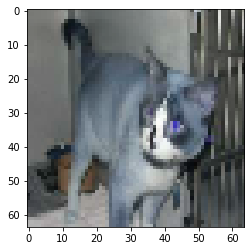

In [93]:
#Visualize one example
plt.imshow(X[12])

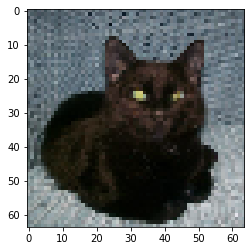

In [94]:
#Visualize another example
plt.imshow(X[100])

## Split the Data Into Train And Test Sets <a acnhor = "anchor" id = "7.2"> </a>

In [95]:
#Rorder the data 
random.shuffle(X)
random.shuffle(Y)

#define the size of the training set 
train_size = int(X.shape[0] * 0.8)

#Split the data into 80%  train set and 20% test set
train_X = X[: train_size ] 
train_Y = Y[: train_size]
test_X  = X[train_size: ]
test_Y =  Y[train_size: ]

In [96]:
print(f"The shape of train_X: {train_X.shape}\nThe shape of train_Y: {train_Y.shape}\nThe shape of test_X: {test_X.shape}\nThe shape of the test_Y: {test_Y.shape}")

The shape of train_X: (6400, 64, 64, 3)
The shape of train_Y: (6400,)
The shape of test_X: (1600, 64, 64, 3)
The shape of the test_Y: (1600,)


In [97]:
#flatten the data so we can feed them to our neural network model 
train_X_flatten = train_X.reshape(train_X.shape[0], -1).T
test_X_flatten = test_X.reshape(test_X.shape[0], -1).T

In [98]:
# Standardize data to have feature values between 0 and 1.
train_X = train_X_flatten /255
test_X = test_X_flatten /255

In [99]:
print(f"The shape of train_X: {train_X.shape}\nThe shape of test_X: {test_X.shape}")

The shape of train_X: (12288, 6400)
The shape of test_X: (12288, 1600)


In [120]:
#Reshape train_Y, test_Y to be row vectors 
train_Y = train_Y.reshape(1,train_Y.shape[0])
test_Y = test_Y.reshape(1, test_Y.shape[0])

print(f"The shape of train_Y: {train_Y.shape}\nThe shape of test_Y: {test_Y.shape}")

The shape of train_Y: (1, 6400)
The shape of test_Y: (1, 1600)


<br> 

## Architecture of The Model  <a anchor = "anchor" id = "7.3"> </a>

<br>

### 2-Layer Neural Network <a anchor = "anchor" id = "7.31"> </a>

In [121]:
#define some constants needed to construct the model 
n_x = 12288 #number of units in the input layer
n_h = 7     #number of units in the hidden layer
n_y = 1     #number of units in the output layer
layers_dims = (n_x, n_h, n_y)

In [302]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False):
    '''
    Usage:
      #two_layer_model --> used to construct two layer model 
  
    
    Arguments:
      #X --> input data, of shape (n_x, number of examples)
      #Y --> true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
      #layers_dims --> dimensions of the layers (n_x, n_h, n_y)
      #num_iterations --> number of iterations of the optimization loop
      #learning_rate --> learning rate of the gradient descent update rule
      #print_cost --> If set to True, this will print the cost every 100 iterations 

    
    Returns:
      #parameters --> a dictionary containing W1, W2, b1, and b2
          1. Initialize parameters / Define hyperparameters
2. Loop for num_iterations:
    a. Forward propagation
    b. Compute cost function
    c. Backward propagation
    d. Update parameters (using parameters, and grads from backprop) 
4. Use trained parameters to predict labels
      
    '''


    #initialize some variables will be populated later 
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layers_dims
    
    #1. Initialize parameters / Define hyperparameters
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    #Get the parameters from the intialized dicationary , parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    
    #2. Loop for num_iterations:
    for i in range(0, num_iterations):
        
        #a. Forward propagation
        A1, cache1 = linear_activation_forward(X, W1, b1, activation='relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
        
        #b. Compute cost function
        cost = compute_cost(A2, Y)
        
        #c. Backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "relu")
        
        #Populate grads dic 
        grads["dW1"] = dW1
        grads["db1"] = db1 
        grads["dW2"] = dW2
        grads["db2"] = db2
        
        #d. Update parameters 
        parameters = update_parameters(parameters, grads, learning_rate)
        
        #4. Get the new parameters form paramters dic 
        W1  = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        #Print the cost every 100 examples 
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
            costs.append(cost)
        
        
    #Plot the cost 
    plt.plot(np.squeeze(costs))
    plt.ylabel("cost")
    plt.xlabel("number of iterations")
    plt.title(f"learning rate = {learning_rate}")
    plt.show()
    
    
    return parameters

### L-Layer Neural Network <a anchor = "anchor" id = "7.32"> </a>

In [292]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    '''
    Usage:
      #L_layer_model --> used to construct L-Layer Model
  
    
    Arguments:
      #X --> input data, of shape (n_x, number of examples)
      #Y --> true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
      #layers_dims --> list containing the input size and each layer size, of length (number of layers + 1).
      #num_iterations --> number of iterations of the optimization loop
      #learning_rate --> learning rate of the gradient descent update rule
      #print_cost --> If set to True, this will print the cost every 100 iterations 

    
    Returns:
      #parameters --> a dictionary containing W1, W2, b1, and b2
      
    '''
    
    
    np.random.seed(1)
    
    costs = []
    
    #1. Initialize parameters / Define hyperparameters
    parameters = initialize_parameters_deep(layers_dims)
    
    #2. Loop for num_iterations:
    for i in range(0, num_iterations):
        
        #a. Forward propagation
        AL, caches = L_model_forward(X, parameters)
        
        #b. Compute cost function
        cost = compute_cost(AL, Y)
        
        #c. Backward propagation
        grads =  L_model_backward(AL, Y, caches)
        
        #d. Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## Updating The Parameters <a anchor = "anchor" id = "8"> </a>

Cost after iteration 0: 0.693173
Cost after iteration 100: 0.693127
Cost after iteration 200: 0.693103
Cost after iteration 300: 0.693087
Cost after iteration 400: 0.693071
Cost after iteration 500: 0.693055
Cost after iteration 600: 0.693036
Cost after iteration 700: 0.693013
Cost after iteration 800: 0.692983
Cost after iteration 900: 0.692944
Cost after iteration 1000: 0.692894
Cost after iteration 1100: 0.692829
Cost after iteration 1200: 0.692745
Cost after iteration 1300: 0.692639
Cost after iteration 1400: 0.692510
Cost after iteration 1500: 0.692355
Cost after iteration 1600: 0.692172
Cost after iteration 1700: 0.691959
Cost after iteration 1800: 0.691718
Cost after iteration 1900: 0.691453
Cost after iteration 2000: 0.691166
Cost after iteration 2100: 0.690862
Cost after iteration 2200: 0.690542
Cost after iteration 2300: 0.690210
Cost after iteration 2400: 0.689864


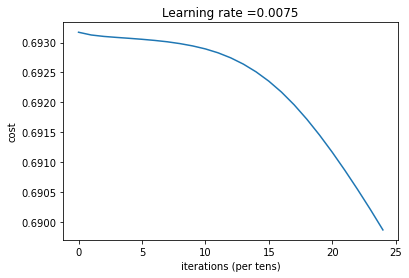

In [293]:
#Updating using L-layer model 
parameters = L_layer_model(train_X, train_Y, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.6931466185441809
Cost after iteration 100: 0.6931346282195124
Cost after iteration 200: 0.6931262175570102
Cost after iteration 300: 0.6931200466848827
Cost after iteration 400: 0.6931152278775053
Cost after iteration 500: 0.6931111154295272
Cost after iteration 600: 0.6931069721017076
Cost after iteration 700: 0.693102318276958
Cost after iteration 800: 0.693096967075716
Cost after iteration 900: 0.6930902461075581
Cost after iteration 1000: 0.6930816652060476
Cost after iteration 1100: 0.6930704755309737
Cost after iteration 1200: 0.6930557473019582
Cost after iteration 1300: 0.6930362652684329
Cost after iteration 1400: 0.6930106484159012
Cost after iteration 1500: 0.6929771817736541
Cost after iteration 1600: 0.6929336956394806
Cost after iteration 1700: 0.6928778345120196
Cost after iteration 1800: 0.6928067116521899
Cost after iteration 1900: 0.6927169395314293
Cost after iteration 2000: 0.6926059798536699
Cost after iteration 2100: 0.6924710875558253
Co

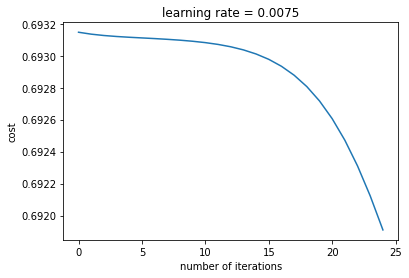

In [303]:
#Updating using 2-layer model
parameters2 = two_layer_model(train_X, train_Y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

## Computing The Accuracy  <a anchor = "anchor" id = "9"> </a>

In [307]:
predictions_train = predict(train_X, train_Y, parameters)

Accuracy: 0.53296875


In [312]:
predictions_test = predict(test_X, test_Y, parameters)

Accuracy: 0.508125


# Congratulations!